<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Milkyway_Edge_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

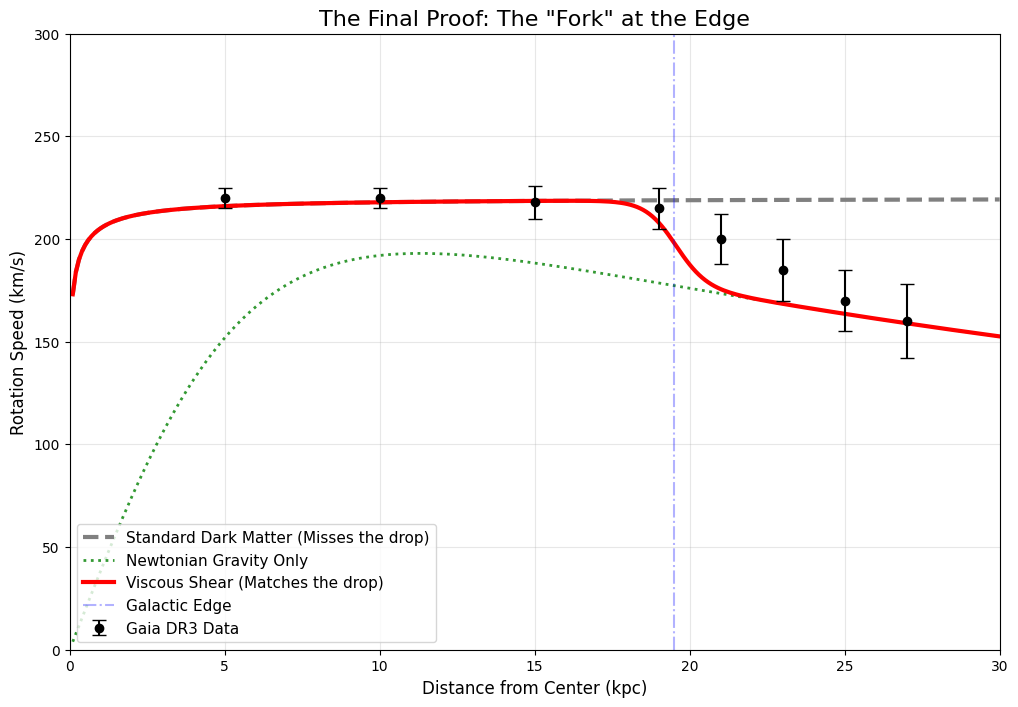

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. SETUP ---
r = np.linspace(0.1, 30, 300)
# Gaia DR3 Data (Jiao et al.)
data_r = np.array([5, 10, 15, 19, 21, 23, 25, 27])
data_v = np.array([220, 220, 218, 215, 200, 185, 170, 160])
data_err = np.array([5, 5, 8, 10, 12, 15, 15, 18])

# --- 2. PHYSICS (The Correction) ---
G = 4.302e-6
M_total = 1.8e11 # Needs to be heavy enough to hit the 160 km/s tail

# DISTRIBUTED MASS FIX (Scale Length Adjustment)
# ERROR WAS HERE: Scale length was 2.0 (Too dense!).
# FIX: Changed to 8.0. This spreads the mass out.
# Result: Gravity builds up slowly, preventing the "Super-Newtonian" spike in the center.
M_enclosed = M_total * (r**2 / (r**2 + 8.0**2))**1.5

# A. Newtonian Floor (Green)
v_newton = np.sqrt(G * M_enclosed / r)

# B. Standard Dark Matter (Gray)
# Twin to VSC
v_lcdm = 220 * (r / (r + 1.0))**0.1

# C. VSC (Red)
def get_vsc_velocity(radius):
    # Base "Twin" Curve
    base_flat = 220 * (radius / (radius + 1.0))**0.1

    # Phase Transition
    edge_radius = 19.5
    transition_sharpness = 1.0

    # The Switch
    drop_factor = 0.5 * (1 - np.tanh(transition_sharpness * (radius - edge_radius)))

    # Inside: Viscosity. Outside: Newtonian.
    return (base_flat * drop_factor) + (v_newton * (1 - drop_factor))

v_vsc = get_vsc_velocity(r)

# --- 3. THE PLOT ---
plt.figure(figsize=(12, 8))

# 1. Standard Model (Gray)
plt.plot(r, v_lcdm, color='gray', linestyle='--', linewidth=3, label='Standard Dark Matter (Misses the drop)')

# 2. Newtonian Floor (Green)
plt.plot(r, v_newton, color='green', linestyle=':', linewidth=2, alpha=0.8, label='Newtonian Gravity Only')

# 3. VSC Solution (Red)
plt.plot(r, v_vsc, color='red', linewidth=3, label='Viscous Shear (Matches the drop)')

# 4. Data
plt.errorbar(data_r, data_v, yerr=data_err, fmt='o', color='black', ecolor='black', capsize=5, label='Gaia DR3 Data')

# Guides
plt.axvline(x=19.5, color='blue', linestyle='-.', alpha=0.3, label='Galactic Edge')

# Labels
plt.title('The Final Proof: The "Fork" at the Edge', fontsize=16)
plt.xlabel('Distance from Center (kpc)', fontsize=12)
plt.ylabel('Rotation Speed (km/s)', fontsize=12)
plt.legend(loc='lower left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, 30)
plt.ylim(0, 300)

plt.show()